# KENYA AGRICULTURAL DOMESTIC SUPPLY PREDICTION

### Aim : Try and predict Kenya's domestic agricultural supply(crop/animal) for the next number of years

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")
import os
from IPython.display import clear_output
import re

C:\Users\Aseta\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get tha data for Kenya from the available csv's

In [2]:

def data_processing(file_name,country):
    file_path = os.path.join("FAO data/",file_name)
    with open(file_path,"r") as f:
        data=f.read()

    data = io.StringIO(data)
    df=pd.read_csv(data)
    df = df.loc[df["Area"]==country]
    display(df.head(10))#Print wasn't working
    #10 is enough for you to see enough of the categories
    
    params_for_selecting={}#dictionary for selection
    print("Key = column, Value = What in the column to select by")
    print("\nENTER q TO QUIT\n")
    print("MMAKE SURE ENTRIES HAVE SINGLE QUOTAION MARKS\n")
    
    while True:    
        query_key=input("Key:\t ")
        if query_key=="q":
            break
        
        try:
            if query_key in df.columns:                
                query_value=input("Value:\t ")
                if query_value=="q":
                    break
                
                copy_of_query_val = query_value
                
                #copy paste/type values with quotes
                #query_value = re.findall("[^']+(?=')",query_value ) 
                query_value = [x for x in re.findall("[^'*]+",query_value) if x!=' '] #pick the values and put them in a list
                print(query_value)
                if any(x not in df[query_key].unique() for x in query_value):#if you enter a wrong value show correct options
                    print(copy_of_query_val," NOT IN " ,df[query_key].unique())
                
                else:
                    if all(x in df[query_key].unique() for x in query_value) :#check if all values entered are "labels" in that column 
                        if query_key in params_for_selecting:
                                if any(y in params_for_selecting[query_key] for y in query_value ):#check if any value already exists in dictionary[key]
                                    list_of_repeated_values = [z for z in query_value if z in params_for_selecting[query_key]]   
                                    print("REPEATED VALUES",list_of_repeated_values)
                                else: 
                                    params_for_selecting[query_key].extend(query_value)                               
                        else:
                            params_for_selecting[query_key]=query_value #don't use =list , it is already a list

                    else:
                        for i in query_value:
                            if i not in df[query_key].unique():
                                print(i ," not in ",query_key)

            else:
                print("Column Not Found")
        except: 
            pass
        
    display(params_for_selecting)#se the dictionary
    
    
    for key in params_for_selecting:
        df = df[df[key].isin(params_for_selecting[key])]
    
    #grouping based on certain columns
    columns_to_groupby=[]
    while True:
        column_chosen=input("\nColumn to group by : ")
        if column_chosen=="q":
            break  
        if column_chosen not in df.columns:
            print("Value not Found")
        else:
            columns_to_groupby.append(column_chosen)
    if len(columns_to_groupby)==0:
        columns_to_groupby=list(params_for_selecting.keys())#use selection keys if no column for grouping was chosen
        
    non_year_cols = df.columns[:7]
    new_df=df.drop([i for i in non_year_cols if i not in columns_to_groupby],axis=1)
    
    #remove the years with F at the end
    year_columns=[]
    number_year_columns=[]
    for i in new_df.columns:
        k = re.findall("Y[0-9]+(?=F)",i)      #doesn't pick columns if none have F
        if len(k)!=0:
            k = k[0].lstrip("Y")
            year_columns.extend([k,i])
            number_year_columns.append(k)
   
    if len(year_columns)==0:
        year_columns=[]
        for i in new_df.columns:
            k = re.findall("Y[0-9]+(?!F)",str(i))
            if len(k)!=0:
                k = k[0].lstrip("Y")
                #year_columns.extend([k,i])
                number_year_columns.append(k)
               
    if len(new_df.columns)!=(len(number_year_columns)+len(columns_to_groupby)): #if no. of clean years is not same as columns that means the columns were in doubles
        new_df.columns = columns_to_groupby+year_columns
    else:
        new_df.columns = columns_to_groupby+number_year_columns
             
    #change the list of columns to pick the values in correct year_columns
    col_list = columns_to_groupby.copy()  #col_list = columns_to_groupby alters even the initial list
    print(columns_to_groupby)
    col_list.extend(number_year_columns)
    
    #create df with only the required columns
    new_df_select = new_df[col_list]
    
    if len(columns_to_groupby)==0:
        new_df_totals = new_df_select.dropna(how="all").fillna(0).sum()
    if len(columns_to_groupby)>0:
        new_df_totals = new_df_select.dropna(how="all").fillna(0).groupby(columns_to_groupby).sum()
    
    clear_output(wait=False)#clear the data after you've selected 
    
    return new_df_totals,new_df_select
      
    

In [3]:
#Add prefixes/Suffixes to differentiate the data and get columns as dates

#commodity_crops_df_totals,commodity_crops_df=data_processing("CommodityBalances_Crops_E_Africa_1.csv","Kenya")
#commodity_crops_df_totals_pref = commodity_crops_df_totals.T.add_prefix("crop_").T

#commodity_animals_df_totals,commodity_animals_df=data_processing("CommodityBalances_LivestockFish_E_Africa_1.csv","Kenya")
#commodity_animals_df_totals_pref = commodity_animals_df_totals.T.add_prefix("animal_").T

#foodsupply_crops_df_totals,foodsupply_crops_df=data_processing("FoodSupply_Crops_E_Africa_1.csv","Kenya")
#foodsupply_crops_df_totals_pref = foodsupply_crops_df_totals.T.add_prefix("crop_").T

#foodsupply_animals_df_totals,foodsupply_animals_df=data_processing("FoodSupply_LivestockFish_E_Africa_1.csv","Kenya")
#foodsupply_animals_df_totals_pref = foodsupply_animals_df_totals.T.add_prefix("animal_").T

#fertilizers_df_totals,fertilizers_df=data_processing("Inputs_FertilizersProduct_E_Africa_NOFLAG.csv","Kenya")
#fertilizers_df_totals_pref = fertilizers_df_totals.T.add_prefix("fertilizer_").T

#landuse_df_totals,landuse_df=data_processing("Inputs_LandUse_E_Africa_NOFLAG.csv","Kenya")
#landuse_df_totals_pref = landuse_df_totals.T.add_suffix("_(hectares)").T*1000

#pesticides_df_totals,pesticides_df=data_processing("Inputs_Pesticides_Use_E_Africa_NOFLAG.csv","Kenya")
#production_crops_df_totals,production_crops_df=data_processing("Production_Crops_E_Africa_NOFLAG.csv","Kenya")
#production_crops_df_totals_pref = production_crops_df_totals.T.add_prefix("crop_").T

#production_animals_df_totals,production_animals_df=data_processing("Production_LivestockPrimary_E_Africa_NOFLAG.csv","Kenya")
#production_animals_df_totals_pref = production_animals_df_totals.T.add_prefix("animal_").T
#v = production_animals_df_totals_pref.reset_index()["Unit"].str.lstrip("animal_")
#production_animals_df_totals_pref.index = production_animals_df_totals_pref.reset_index()["Element"].astype(str)+" ["+v+"]"

#when you group by more than one element concatination becomes an isue beacuse of multi indexing

#population_totals,population_df = data_processing("Population_E_Africa_NOFLAG.csv","Kenya")#*1000 #data was per 1000
#population_mno = population_totals.copy()
#population_mno = population_mno.loc[:,"1961":"2018"]*1000

#macro_stats_totals,macro_stats_df = data_processing("Macro-Statistics_Key_Indicators_E_Africa_NOFLAG.csv","Kenya")
#macro_stats_totals_pref = macro_stats_totals.T.add_suffix("_US$").T



In [4]:
#kenya_df = pd.concat([commodity_crops_df_totals_pref,commodity_animals_df_totals_pref,foodsupply_crops_df_totals_pref, 
 #                     foodsupply_animals_df_totals_pref,fertilizers_df_totals_pref,landuse_df_totals_pref,pesticides_df_totals,
  #                    production_crops_df_totals_pref,production_animals_df_totals_pref,population_mno,macro_stats_totals_pref] )


#kenya_df.to_csv("kenya combined data correct years.csv")

In [5]:
#crop_data = pd.concat([commodity_crops_df_totals_pref,foodsupply_crops_df_totals_pref,production_crops_df_totals_pref])
#crop_data.to_csv("crop data.csv")

#land_data= landuse_df_totals_pref.copy()
#land_data.to_csv("land data.csv")

#animal_data=pd.concat([commodity_animals_df_totals_pref,foodsupply_animals_df_totals_pref,production_animals_df_totals_pref])
#animal_data.to_csv("animal data.csv")

#pesticide_data=pesticides_df_totals.copy()
#pesticide_data.to_csv("pesticide data.csv")

#fertilizer_data=fertilizers_df_totals_pref.copy()
#fertilizer_data.to_csv("fertilizer data.csv")

#population_data= population_mno.copy()
#population_data.to_csv("population data.csv")

#macro_stats = macro_stats_totals_pref.copy()
#macro_stats.to_csv("macro statistics.csv")

In [6]:
#from google.colab import files
#uploaded = files.upload()

### Enter the number of years you would like to predict

In [7]:
number_of_years_to_predict = int(input("Enter the number of years want to predict : "))

Enter the number of years want to predict :  7


## Load required datasets

### Pesticide/Fertilizer Data is not "enough"... to many missing years

In [8]:
pesticide_data=pd.read_csv("pesticide data.csv")
#pesticide_data

In [9]:
fertilizer_data=pd.read_csv("fertilizer data.csv")
#fertilizer_data

### Land Data

In [10]:
land_data= pd.read_csv("land data.csv")
#Remove those with many zeros
land_data = land_data.set_index("Item").T.replace(0.0,np.nan)
land_data_to_be_retained = [i for i in land_data.columns if land_data[i].count()>int(len(land_data[i])*0.75) ]
land_data=land_data[land_data_to_be_retained].T
land_data.index.name = None
#Remove the constant Land Values... they don't seem to affect anything and bring an issue with calculation(VAR)
columns_to_remain = [i for i in land_data.index if land_data.T[i].nunique()>5]
land_data = land_data.T[columns_to_remain].T

### Crop data

In [11]:
crop_data = pd.read_csv("crop data.csv")
crop_data = crop_data.set_index("Element") 
crop_data.index.name = None
#Add land variables to the crop data
crop_data = pd.concat([crop_data,land_data])

### Animal Data

In [12]:
animal_data  =  pd.read_csv("animal data.csv")

for  i in animal_data["Unnamed: 0"]:
    if i.startswith("("):
        item_index = animal_data["Unnamed: 0"].to_list().index(i)
        animal_data["Unnamed: 0"][item_index] = i.split("'")[1]+"["+i.split("'")[3]+"]"

               
animal_data = animal_data.set_index("Unnamed: 0")
animal_data.index.name = None
#animal_data

### Population Data

In [13]:
population_data = pd.read_csv("population data.csv", index_col="Element")
population_data.index.name=None

### Macro Statistics

In [14]:
macro_stats_data = pd.read_csv("macro statistics.csv")

macro_stats_data  = macro_stats_data.set_index("Item").T.replace(0.0,np.nan)
macro_stats_data_to_be_retained = [i for i in macro_stats_data.columns if macro_stats_data[i].count()>int(len(macro_stats_data[i])*0.75) ]
macro_stats_data = macro_stats_data[macro_stats_data_to_be_retained].T
macro_stats_data.index.name= None

### Concat both population and macrostatistic data to both crop and animal data 

In [15]:
full_crop_data = pd.concat([crop_data,population_data,macro_stats_data]).T
full_crop_data = full_crop_data.loc[:,~full_crop_data.columns.duplicated()] #remove columns with same name since they contain similar data for this case

In [16]:
full_animal_data = pd.concat([animal_data,population_data,macro_stats_data]).T
full_animal_data = full_animal_data.loc[:,~full_animal_data.columns.duplicated()]

In [17]:
#full_animal_data

In [18]:
#Function to backfill for macrostatistics #Missing values for the first few years
def backfill_data(dataframe, index_several_steps_from_start):
    to_bfill = dataframe.loc[:index_several_steps_from_start,:]
    for i in to_bfill.columns:
        if to_bfill[i].count()<len(to_bfill):
            r_numbers = to_bfill[i].values[::-1]
            sum_of_rates=0
            rate = 0
            

            for j,k in enumerate(r_numbers): #Get mean rate of change and use it to back fill
                if ~np.isnan(r_numbers[j+1]):
                    new_rate=abs(r_numbers[j+1]-k)/(k*10)
                    sum_of_rates = sum_of_rates+new_rate
                else:
                    
                    break;

            rate=sum_of_rates/(to_bfill[i].count()-1)
            
            for j,k in enumerate(r_numbers):
                if np.isnan(k):
                    r_numbers[j]= float(format(r_numbers[j-1]*(1-rate), '.5f'))

            
            to_bfill[i][0:len(r_numbers)]=r_numbers[::-1] 

In [19]:
backfill_data(full_animal_data,"1975")
backfill_data(full_crop_data,"1975")

In [20]:
def resample_and_fill(dataframe):
    dataframe.index = pd.date_range(start = pd.datetime( int(dataframe.index[0]),12,1),periods=len(dataframe),freq='A')
    
    n = dataframe.resample('6M',convention='start',closed='right').last()
    
    for j in dataframe.columns:
        for i in range(0,len(n[j]),2):#fill up to where there are NANs 
            try:
                if np.isnan(n[j][i])  and  np.isnan(n[j].iloc[i+1]):#if two empty values are following each other then you are on the "corner" ; missing values
                    break;
                else:
                    n[j][i+1] = n[j][i]
                    n[j][i] = n[j][i+1]
            except:#index error for 115
                pass
            
    n = n.rolling(window=2).mean().dropna(how="all")#drop top rows with nans  
        
    return n

In [21]:
full_animal_data = resample_and_fill(full_animal_data)
full_crop_data = resample_and_fill(full_crop_data)

In [22]:
#full_animal_data.tail(15)

In [23]:
#full_crop_data.tail(15)

In [24]:
from statsmodels.tsa.stattools import adfuller
def adfuller_testt(series , name='', signif = 0.05, verbose =False):
    adf_result = adfuller(series,autolag ='AIC')
    output = {'test statistic ': round(adf_result[0],4),'pvalue' :round(adf_result[1],4),'n_lags ':round(adf_result[2],4),'n_observations ':adf_result[3]}
    p_value=output['pvalue']
    
    if p_value<=signif:
        print("adf True")
    else:
        print("adf False")

### fill for For any column with nulls at the end

In [25]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation

Using TensorFlow backend.


In [26]:
#LSTM function
def model_for_lstm_filling(x_train ,y_train,lstm_units):
    model = Sequential()
    model.add(LSTM(units=lstm_units,return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    #model.add(LSTM(units=lstm_units,return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(LSTM(units=lstm_units,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer="adam",loss="mean_squared_error")
    model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=0)

    return model

In [27]:
def filling_the_nulls(data,lstm_units):
    
    true_length = data.count()
    val = len(data)-true_length
    vals_to_use=true_length-val
    training_data = data[:true_length]
    
    #make the series stationary
    if all( h>0 for h in  training_data):
        training_data_scaled_log2 = np.log2(training_data)            
        training_data_scaled  = training_data_scaled_log2.diff().dropna()
        
    else:
        for index_of_zero_val,g in enumerate(training_data):
            if g == 0.0:
                training_data[index_of_zero_val] = 1
                
        negative_vals_indices  = training_data.index[training_data<0]
        training_data = abs(training_data) #cater for negative values
        training_data_scaled_log2 = np.log2(training_data)
        training_data_scaled_log2[negative_vals_indices] = training_data_scaled_log2[negative_vals_indices ]*-1          
        training_data_scaled  = training_data_scaled_log2.diff().dropna()
        
          
    x=[]
    y=[]
    for j in range(vals_to_use-1,true_length-1): #true_length-1 because of the dropna
        x.append(training_data_scaled[j-(vals_to_use-1):j])
        y.append(training_data_scaled[j])

    x_train,y_train=np.array(x),np.array(y)
    

    x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

    model = model_for_lstm_filling(x_train, y_train,lstm_units)

    initial_prediction = model.predict(x_train)
    
    #inverse transform the prediction
    inverse_diff_pred = training_data_scaled_log2[-1]+initial_prediction.cumsum()
    if all(h for h in inverse_diff_pred>0):
        prediction = 2**inverse_diff_pred
    else:
        prediction = 2**abs(inverse_diff_pred)
        for ind, item in enumerate(initial_prediction):
            if item<0:
                prediction[ind]= prediction[ind]*-1#cater for negative predictions
        
    
    return prediction

In [28]:
def filling_df(data,lstm_units):
    df = data.copy()
    for i in df.columns:
        true_len = df[i].count()#check if there are any nulls
        if true_len < len(df[i]):
            pred=filling_the_nulls(df[i],lstm_units)
            prediction = []
            for j in pred:
                prediction.append(j)
                data[i][-len(prediction):] = prediction
        
    return data

In [29]:
crop_full_df = filling_df(full_crop_data,30)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [30]:
crop_full_df.tail(20)

,crop_Domestic supply quantity,crop_Export Quantity,crop_Feed,crop_Food supply quantity (tonnes),crop_Import Quantity,crop_Other uses,crop_Processing,crop_Production,crop_Seed,crop_Stock Variation,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
2009-06-30,46394264.0,2465359.00,7.306070e+05,33725702.0,5123714.0,349459.000,8991590.0,42014407.0,416269.00000,1.721507e+06,...,30222715.0,39791981.0,20040720.0,19751264.0,8925701.0,35896.878739,916.943325,6771.591389,35843.619058,915.582869
2009-12-31,47344378.0,2242504.50,7.887825e+05,34223073.0,6900841.5,377271.000,9321551.0,42645915.0,424136.00000,4.013150e+04,...,30565894.5,40346886.5,20318537.5,20028353.5,9126915.5,36459.590297,918.522289,6811.193259,36410.077330,917.273356
2010-06-30,48294492.0,2019650.00,8.469580e+05,34720444.0,8677969.0,405083.000,9651512.0,43277423.0,432003.00000,-1.641244e+06,...,30909074.0,40901792.0,20596355.0,20305443.0,9328130.0,37022.301855,920.101254,6850.795129,36976.535603,918.963843
2010-12-31,49092401.0,2223755.50,9.203960e+05,35388765.5,7585427.0,430830.000,9657556.5,45101255.5,434867.00000,-1.370523e+06,...,31256278.5,41466234.0,20879098.5,20587142.5,9537399.5,38510.989749,943.720888,7489.726139,38396.359892,940.933407
2011-06-30,49890310.0,2427861.00,9.938340e+05,36057087.0,6492885.0,456577.000,9663601.0,46925088.0,437731.00000,-1.099802e+06,...,31603483.0,42030676.0,21161842.0,20868842.0,9746669.0,39999.677643,967.340523,8128.657148,39816.184182,962.902970
2011-12-31,49426160.5,2225353.00,1.086508e+06,35619581.5,7310474.0,458073.500,9626335.5,45490823.0,462016.50000,-1.149784e+06,...,31953360.5,42604475.0,21449500.0,21154977.0,9965135.0,40976.564691,977.393173,8337.966010,40888.306547,975.256507
2012-06-30,48962011.0,2022845.00,1.179181e+06,35182076.0,8128063.0,459570.000,9589070.0,44056558.0,486302.00000,-1.199765e+06,...,32303238.0,43178274.0,21737158.0,21441112.0,10183601.0,41953.451738,987.445824,8547.274872,41960.428912,987.610043
2012-12-31,51053436.5,1907047.50,1.236488e+06,37175570.5,7601019.0,387562.500,9590437.0,46366025.5,487223.00000,-1.006562e+06,...,32655219.0,43760870.5,22029433.0,21731436.5,10411515.0,46181.805020,1071.203458,9622.062610,46028.753145,1067.699026
2013-06-30,53144862.0,1791250.00,1.293794e+06,39169065.0,7073975.0,315555.000,9591804.0,48675493.0,488144.00000,-8.133580e+05,...,33007200.0,44343467.0,22321708.0,22021761.0,10639429.0,50410.158302,1154.961092,10696.850348,50097.077378,1147.788009
2013-12-31,53651931.5,2262035.50,1.137425e+06,39613587.5,7164716.0,604885.500,9662879.0,48824276.5,487357.00000,-7.502400e+04,...,33359945.5,44931724.0,22616948.5,22314779.0,10876793.5,52753.450943,1192.031254,11023.546799,52296.925297,1181.752626


In [31]:
animal_full_df=filling_df(full_animal_data,30)

In [32]:
animal_full_df.tail(20)

,animal_Domestic supply quantity,animal_Export Quantity,animal_Feed,animal_Food supply quantity (tonnes),animal_Import Quantity,animal_Other uses,animal_Processing,animal_Production,animal_Seed,animal_Stock Variation,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
2009-06-30,15357208.0,153477.000000,1183882.000,12574453.0,121267.000000,73290.000000,605400.0000,15373527.0,3000.000000,15893.000000,...,30222715.0,39791981.0,20040720.0,19751264.0,8925701.0,35896.878739,916.943325,6771.591389,35843.619058,915.582869
2009-12-31,16171588.0,151258.000000,1181415.000,13347581.5,140187.500000,75291.500000,605399.5000,16155139.0,3180.000000,27520.500000,...,30565894.5,40346886.5,20318537.5,20028353.5,9126915.5,36459.590297,918.522289,6811.193259,36410.077330,917.273356
2010-06-30,16985968.0,149039.000000,1178948.000,14120710.0,159108.000000,77293.000000,605399.0000,16936751.0,3360.000000,39148.000000,...,30909074.0,40901792.0,20596355.0,20305443.0,9328130.0,37022.301855,920.101254,6850.795129,36976.535603,918.963843
2010-12-31,17133616.0,173665.500000,1202785.500,14220716.0,169817.500000,78711.500000,616524.0000,17090641.0,3700.000000,46823.000000,...,31256278.5,41466234.0,20879098.5,20587142.5,9537399.5,38510.989749,943.720888,7489.726139,38396.359892,940.933407
2011-06-30,17281264.0,198292.000000,1226623.000,14320722.0,180527.000000,80130.000000,627649.0000,17244531.0,4040.000000,54498.000000,...,31603483.0,42030676.0,21161842.0,20868842.0,9746669.0,39999.677643,967.340523,8128.657148,39816.184182,962.902970
2011-12-31,17510710.0,172831.500000,1240831.000,14520005.0,202953.000000,78780.000000,634024.5000,17447715.5,3750.000000,32874.000000,...,31953360.5,42604475.0,21449500.0,21154977.0,9965135.0,40976.564691,977.393173,8337.966010,40888.306547,975.256507
2012-06-30,17740156.0,147371.000000,1255039.000,14719288.0,225379.000000,77430.000000,640400.0000,17650900.0,3460.000000,11250.000000,...,32303238.0,43178274.0,21737158.0,21441112.0,10183601.0,41953.451738,987.445824,8547.274872,41960.428912,987.610043
2012-12-31,17810277.5,147371.000000,1289111.500,14730328.0,255211.500000,78581.500000,656900.0000,17691189.0,3350.000000,11250.000000,...,32655219.0,43760870.5,22029433.0,21731436.5,10411515.0,46181.805020,1071.203458,9622.062610,46028.753145,1067.699026
2013-06-30,17880399.0,147371.000000,1323184.000,14741368.0,285044.000000,79733.000000,673400.0000,17731478.0,3240.000000,11250.000000,...,33007200.0,44343467.0,22321708.0,22021761.0,10639429.0,50410.158302,1154.961092,10696.850348,50097.077378,1147.788009
2013-12-31,17821186.5,145979.500000,1299964.500,14715037.5,257300.500000,84313.500000,661800.0000,17698617.5,3310.000000,11250.000000,...,33359945.5,44931724.0,22616948.5,22314779.0,10876793.5,52753.450943,1192.031254,11023.546799,52296.925297,1181.752626


In [33]:
# save predicted/filled df to csv instead of rerunning the LSTM
animal_full_df.to_csv("animal_data.csv")
crop_full_df.to_csv("crop_data.csv")

### Now loading the "complete" dataframe

In [34]:
animal_full_lstm_df = pd.read_csv("animal_data.csv",index_col = "Unnamed: 0",parse_dates=True)
crop_full_lstm_df = pd.read_csv("crop_data.csv",index_col = "Unnamed: 0",parse_dates=True)

In [35]:
animal_full_df = animal_full_lstm_df.copy()
crop_full_df = crop_full_lstm_df.copy()

In [36]:
#crop_full_df.index

## Visualizations

In [37]:
plt.rcParams["figure.figsize"]=(20,12)

#### I plotted columns which have values that might be equally large , close together , for easier visibility
#### The values plotted together may not be very much related to each other, this is just to see general trends for each factor

In [38]:
plt.rcParams['figure.figsize']=(20,3)

def line_plotting(dataframe, title):
    list_of_cols=[]
    for i in dataframe.max().sort_values(ascending=False).index:
        if len(list_of_cols) < 2:
            list_of_cols.append(i) 
            if np.array(dataframe[i].max()).std() < 0.10*dataframe[i].max():
                pass
        else:  
            if dataframe[list_of_cols].max().std() < 0.10*dataframe[list_of_cols].max().max():
                list_of_cols.append(i)
            else:
                plt.figure()
                plt.title(title,fontsize=25)
                lines = plt.plot(dataframe[list_of_cols])
                plt.legend(dataframe[list_of_cols].columns) 
                list_of_cols=[]    

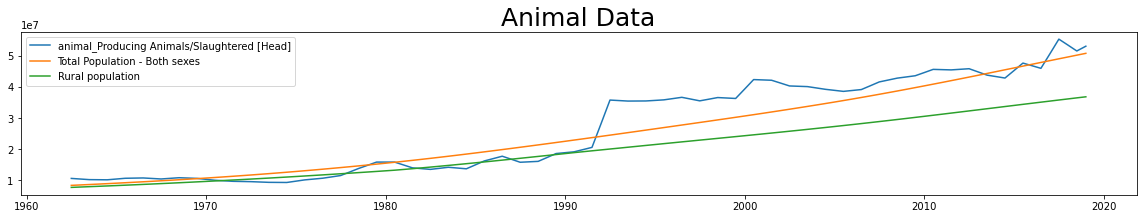

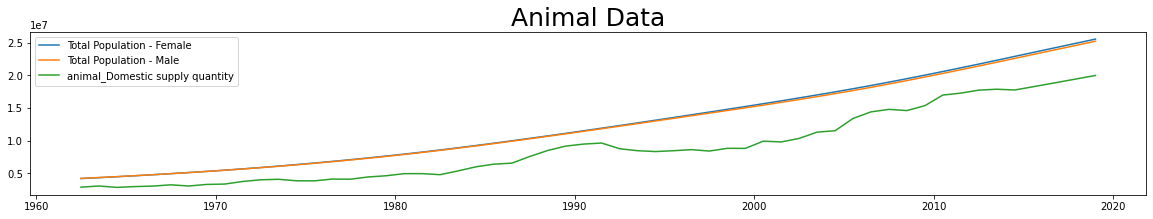

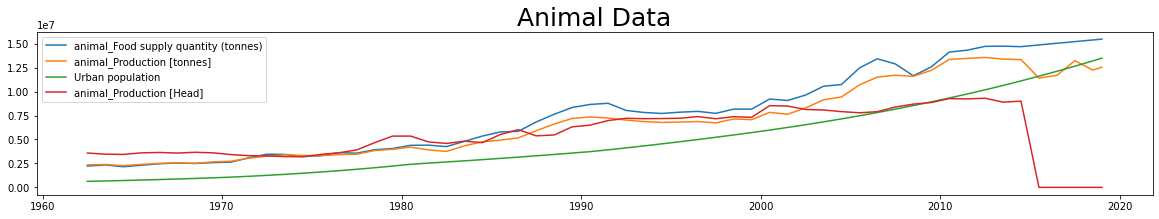

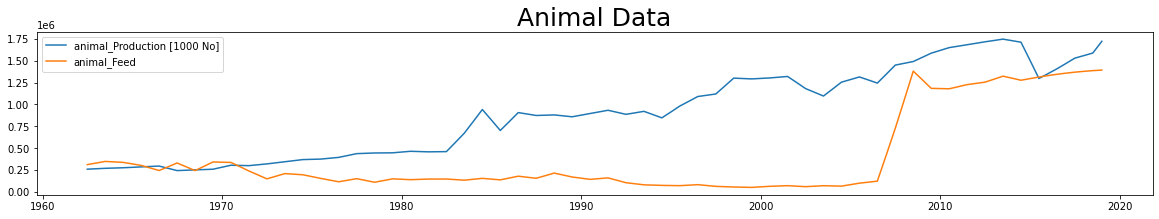

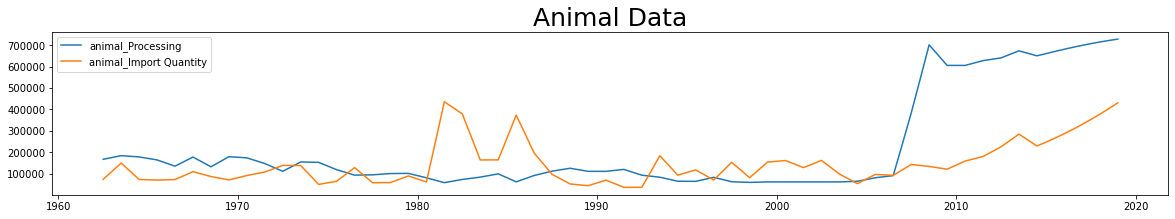

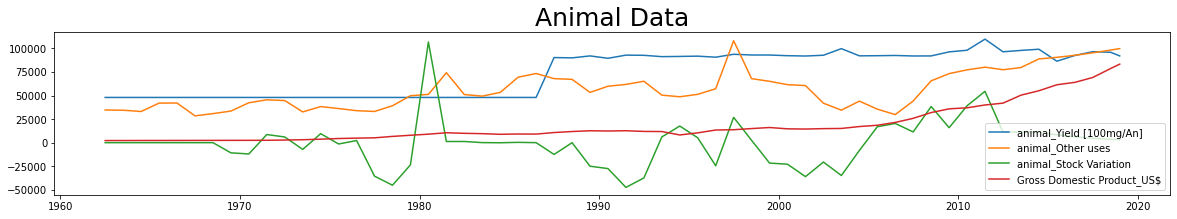

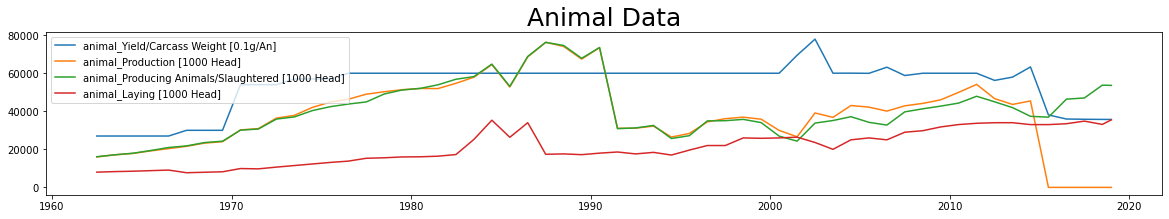

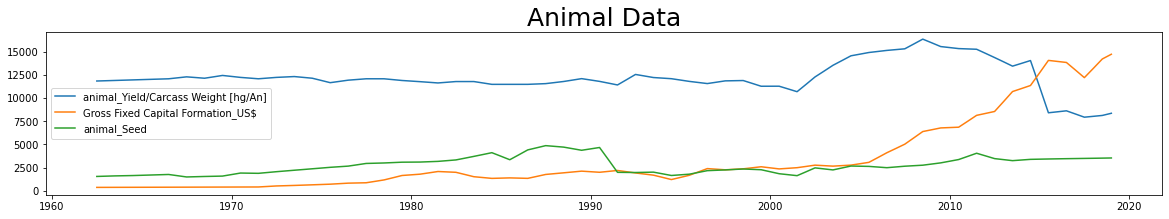

In [39]:
line_plotting(animal_full_df , "Animal Data")

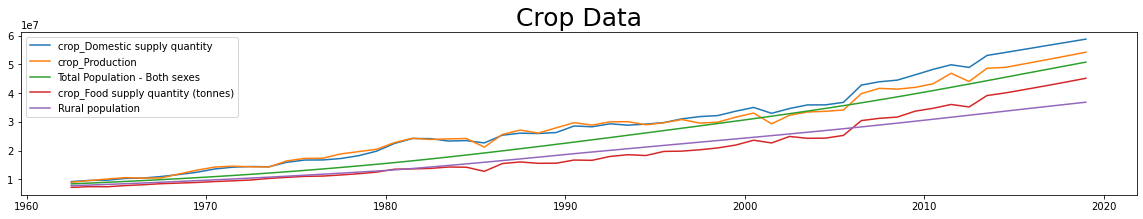

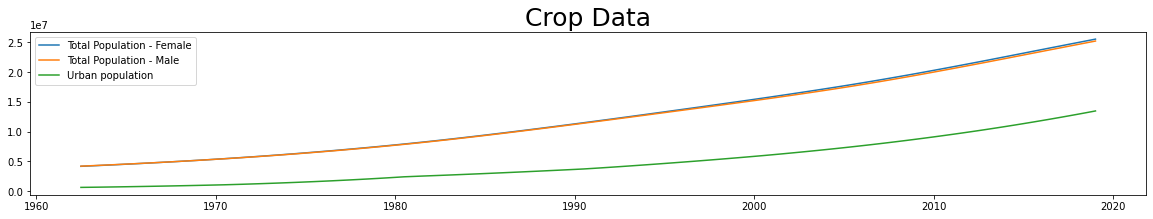

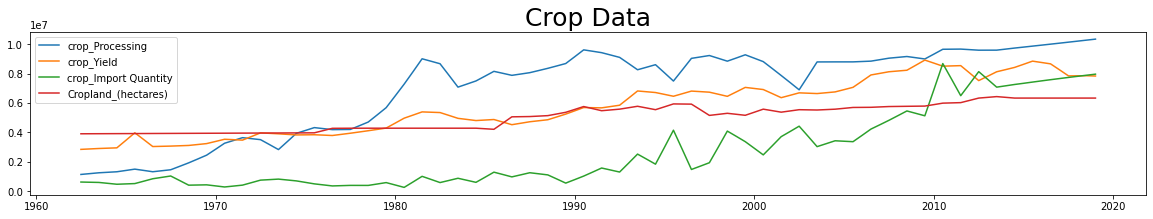

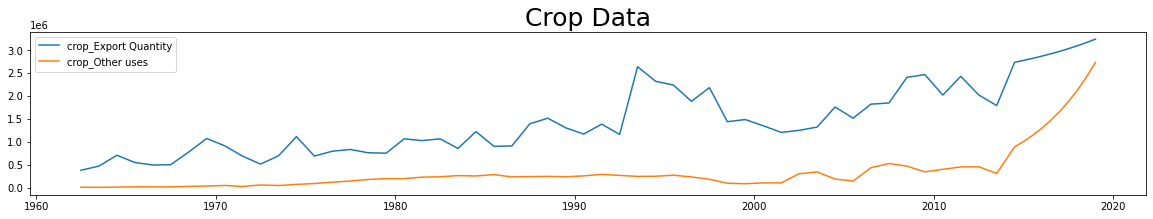

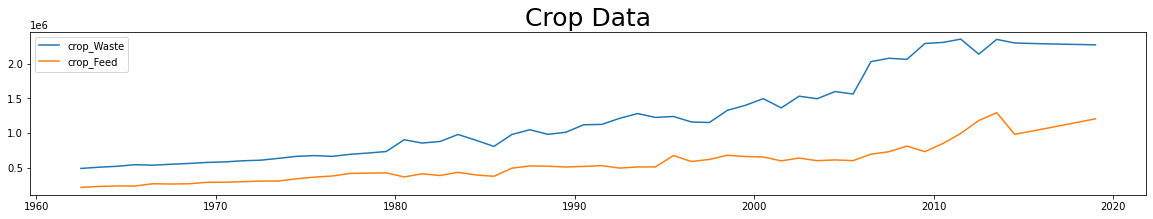

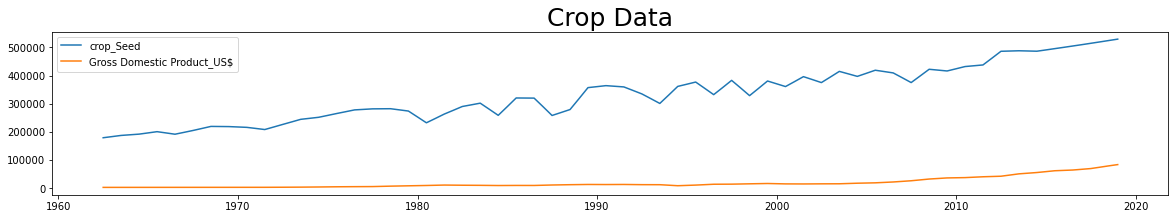

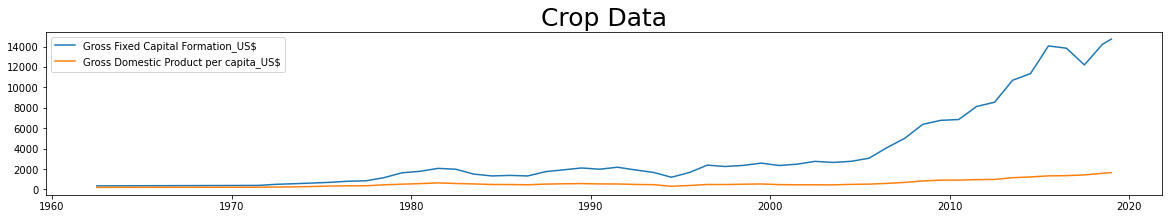

In [40]:
line_plotting(crop_full_df , "Crop Data")

####  Heatmaps are too dense 

In [41]:
#sns.heatmap(animal_full_df.corr(),annot=True)
crop_full_df.corr()

,crop_Domestic supply quantity,crop_Export Quantity,crop_Feed,crop_Food supply quantity (tonnes),crop_Import Quantity,crop_Other uses,crop_Processing,crop_Production,crop_Seed,crop_Stock Variation,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
crop_Domestic supply quantity,1.000000,0.900764,0.965953,0.989864,0.937651,0.727874,0.843952,0.996661,0.971205,0.244051,...,0.988922,0.991998,0.991883,0.992111,0.989924,0.914639,0.912153,0.903859,0.914549,0.915206
crop_Export Quantity,0.900764,1.000000,0.865923,0.894022,0.843224,0.748865,0.761999,0.907112,0.869261,0.289544,...,0.894489,0.896847,0.896414,0.897285,0.895398,0.852550,0.832424,0.833385,0.850617,0.832041
crop_Feed,0.965953,0.865923,1.000000,0.969886,0.945950,0.731650,0.762515,0.960244,0.947835,0.152718,...,0.949433,0.957030,0.956790,0.957272,0.967479,0.930237,0.917131,0.923954,0.930394,0.920336
crop_Food supply quantity (tonnes),0.989864,0.894022,0.969886,1.000000,0.965478,0.760942,0.760041,0.979152,0.955527,0.257488,...,0.977201,0.985382,0.985317,0.985444,0.996899,0.945427,0.922068,0.937912,0.946036,0.926753
crop_Import Quantity,0.937651,0.843224,0.945950,0.965478,1.000000,0.698772,0.644638,0.914479,0.899424,0.159400,...,0.931158,0.942218,0.942233,0.942199,0.960679,0.914998,0.867689,0.912953,0.916764,0.874909
crop_Other uses,0.727874,0.748865,0.731650,0.760942,0.698772,1.000000,0.503940,0.728906,0.700471,0.348630,...,0.679278,0.701861,0.701144,0.702590,0.760943,0.892253,0.870868,0.858196,0.890544,0.869116
crop_Processing,0.843952,0.761999,0.762515,0.760041,0.644638,0.503940,1.000000,0.869775,0.841624,0.184577,...,0.839231,0.823434,0.823097,0.823774,0.773856,0.636939,0.713389,0.610774,0.633988,0.709191
crop_Production,0.996661,0.907112,0.960244,0.979152,0.914479,0.728906,0.869775,1.000000,0.969709,0.210004,...,0.983193,0.984714,0.984525,0.984902,0.978940,0.903150,0.910453,0.890274,0.902504,0.912134
crop_Seed,0.971205,0.869261,0.947835,0.955527,0.899424,0.700471,0.841624,0.969709,1.000000,0.241329,...,0.976720,0.976484,0.976379,0.976587,0.966134,0.872529,0.862973,0.857405,0.871957,0.865244
crop_Stock Variation,0.244051,0.289544,0.152718,0.257488,0.159400,0.348630,0.184577,0.210004,0.241329,1.000000,...,0.260543,0.266592,0.266832,0.266346,0.282300,0.287699,0.246558,0.267277,0.288404,0.251030


In [42]:
#sns.heatmap(animal_full_df.corr(),annot=True)
animal_full_df.corr()

,animal_Domestic supply quantity,animal_Export Quantity,animal_Feed,animal_Food supply quantity (tonnes),animal_Import Quantity,animal_Other uses,animal_Processing,animal_Production,animal_Seed,animal_Stock Variation,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
animal_Domestic supply quantity,1.000000,0.118742,0.774755,0.992708,0.461496,0.707539,0.786828,0.998785,0.401693,0.254720,...,0.978853,0.983992,0.983881,0.984102,0.987161,0.918532,0.898114,0.908879,0.918975,0.902404
animal_Export Quantity,0.118742,1.000000,0.149480,0.110687,-0.199391,-0.157440,0.179658,0.136663,-0.386683,0.381651,...,0.123393,0.124421,0.124993,0.123838,0.124368,0.066915,-0.024484,0.078838,0.068655,-0.019082
animal_Feed,0.774755,0.149480,1.000000,0.696809,0.521877,0.625028,0.998375,0.764137,0.318239,0.412385,...,0.671104,0.698981,0.698668,0.699297,0.765283,0.873195,0.838490,0.892093,0.875475,0.844483
animal_Food supply quantity (tonnes),0.992708,0.110687,0.696809,1.000000,0.414797,0.679722,0.710198,0.994804,0.394569,0.221380,...,0.987196,0.987362,0.987322,0.987399,0.976954,0.872478,0.856320,0.860590,0.872684,0.860346
animal_Import Quantity,0.461496,-0.199391,0.521877,0.414797,1.000000,0.620791,0.503672,0.427671,0.351808,0.237543,...,0.447282,0.467650,0.467112,0.468196,0.520320,0.638494,0.671926,0.630703,0.638269,0.671733
animal_Other uses,0.707539,-0.157440,0.625028,0.679722,0.620791,1.000000,0.626106,0.691231,0.516943,0.232027,...,0.706744,0.712601,0.711726,0.713489,0.722938,0.771523,0.814540,0.758423,0.769236,0.811413
animal_Processing,0.786828,0.179658,0.998375,0.710198,0.503672,0.626106,1.000000,0.776884,0.314313,0.397651,...,0.684852,0.712138,0.711826,0.712452,0.776881,0.881311,0.843967,0.898530,0.883487,0.849842
animal_Production,0.998785,0.136663,0.764137,0.994804,0.427671,0.691231,0.776884,1.000000,0.391959,0.255551,...,0.979253,0.983043,0.982975,0.983108,0.982225,0.901293,0.880353,0.893620,0.901815,0.884866
animal_Seed,0.401693,-0.386683,0.318239,0.394569,0.351808,0.516943,0.314313,0.391959,1.000000,0.134469,...,0.345615,0.348112,0.347352,0.348883,0.353642,0.406922,0.539594,0.400722,0.404968,0.532951
animal_Stock Variation,0.254720,0.381651,0.412385,0.221380,0.237543,0.232027,0.397651,0.255551,0.134469,1.000000,...,0.206417,0.219125,0.219282,0.218965,0.248256,0.266482,0.277639,0.283903,0.269283,0.282921


#### Since i'm trying to predict what dometic supply might/should be, I thought it best to take correlation of each factor to Domestic supply quantity

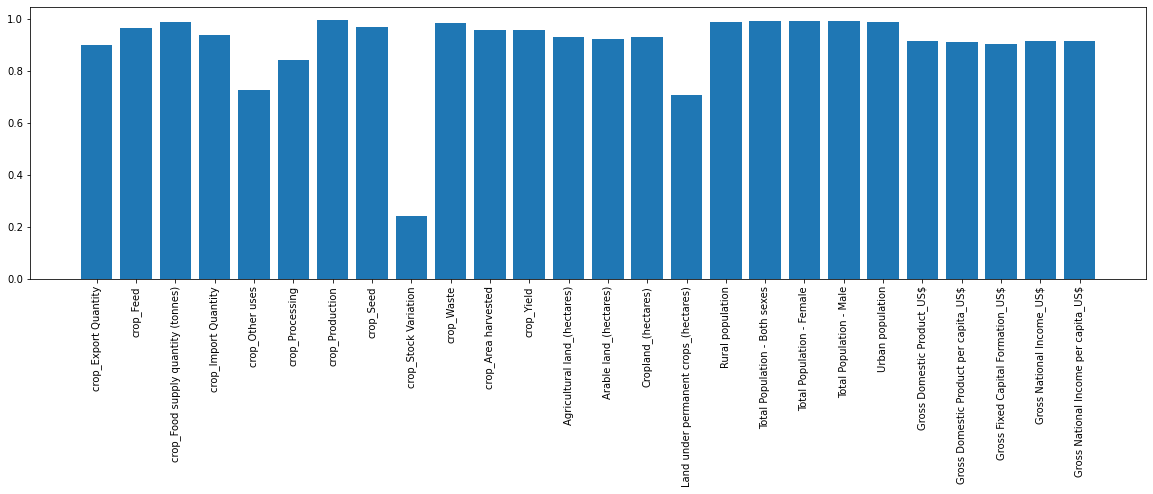

In [43]:
#sns.heatmap(crop_full_df.corr(),annot=True)
plt.figure(figsize=(20,5))
cols_vs_dsq = crop_full_df.columns [crop_full_df.columns!="crop_Domestic supply quantity"]
plt.bar(cols_vs_dsq,crop_full_df.corr()["crop_Domestic supply quantity"][cols_vs_dsq])
plt.xticks(rotation = 90)
plt.show()

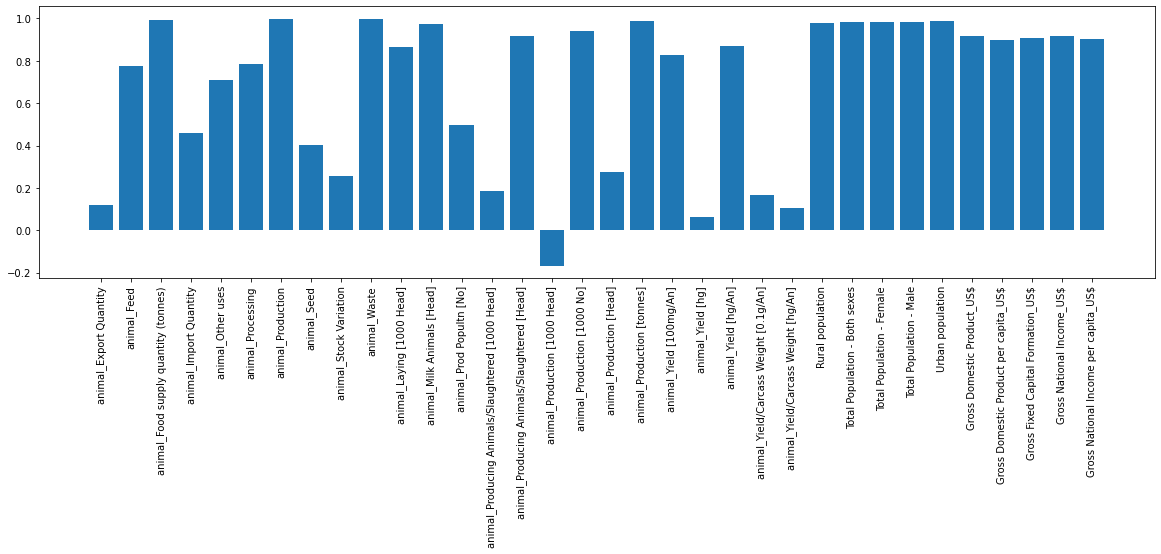

In [44]:
plt.figure(figsize=(20,5))
cols_vs_dsq = animal_full_df.columns [animal_full_df.columns!="animal_Domestic supply quantity"]
plt.bar(cols_vs_dsq,animal_full_df.corr()["animal_Domestic supply quantity"][cols_vs_dsq])
plt.xticks(rotation = 90)
plt.show()

### Regression plots

In [45]:
#see if it makes sense to regress, observing whether most values fit a regression plot
plt.rcParams['figure.figsize']=(20,24)
def regression_plots(dataframe,target_column,number_of_plots_per_row):
    df_columns=dataframe.columns[dataframe.columns!=target_column]
    df=dataframe[df_columns]
    rows = int(np.ceil(len(df_columns)/number_of_plots_per_row))
    
    fig,axes=plt.subplots(rows,number_of_plots_per_row,sharey=True)
    for i in range (len(df_columns)):
        x=i//number_of_plots_per_row
        y=i%number_of_plots_per_row
        sns.regplot( x=dataframe[df_columns[i]], y=dataframe[target_column], ax=axes[x,y])
        

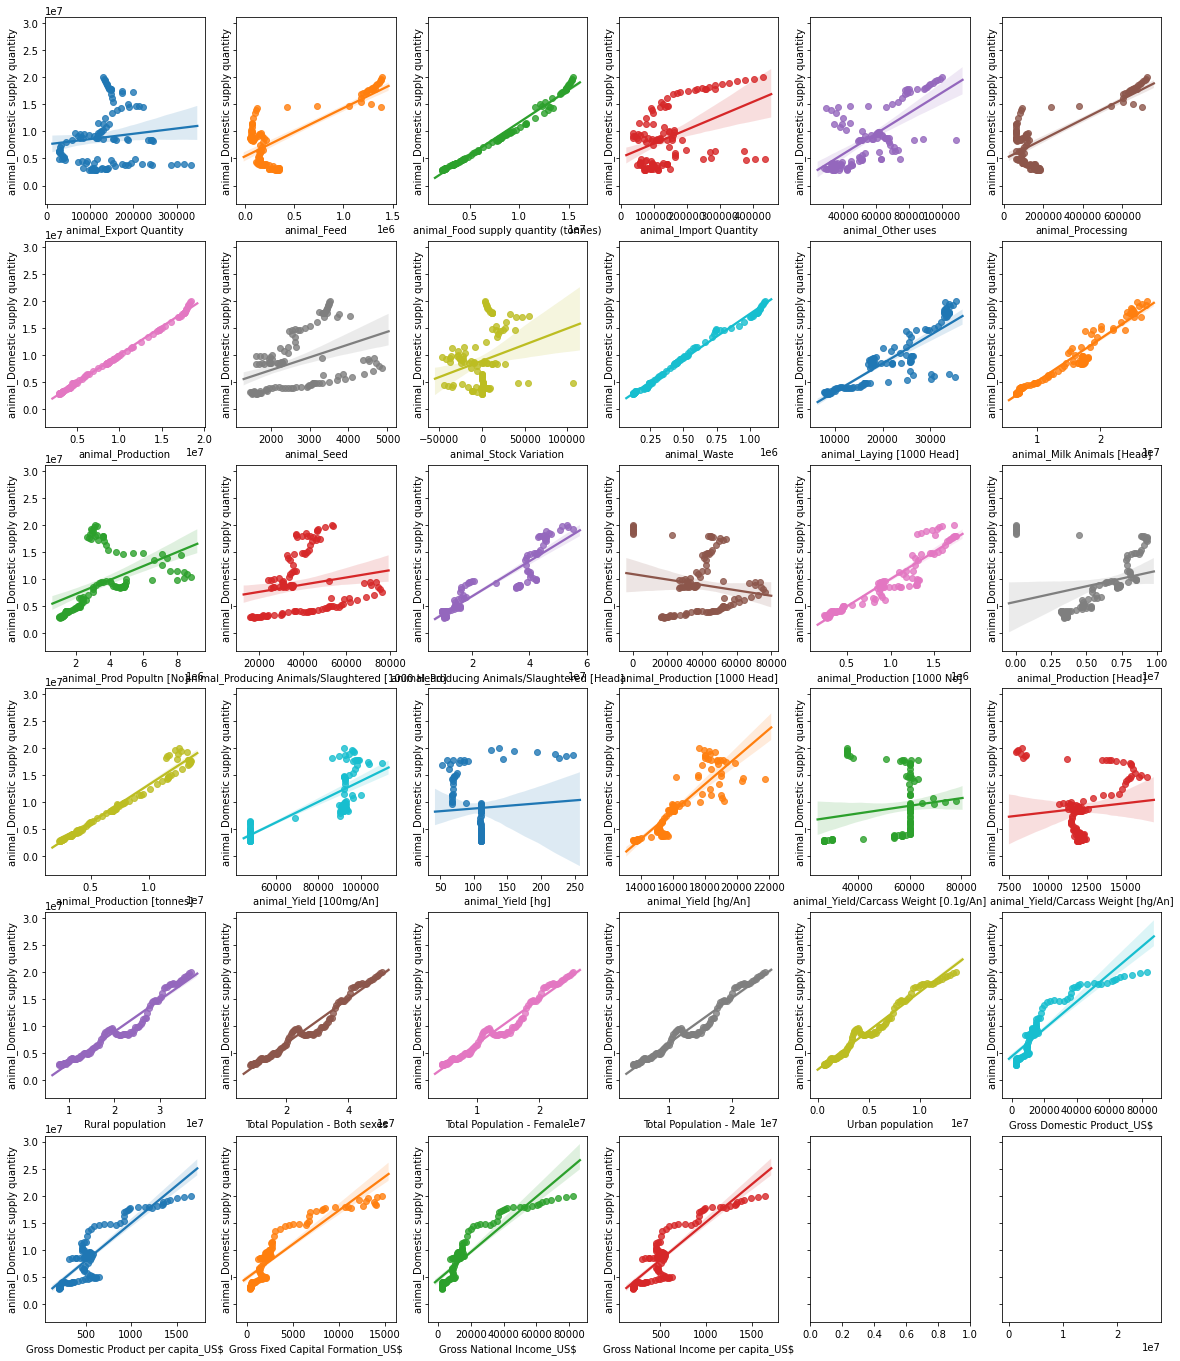

In [46]:
regression_plots(animal_full_df,"animal_Domestic supply quantity",6)

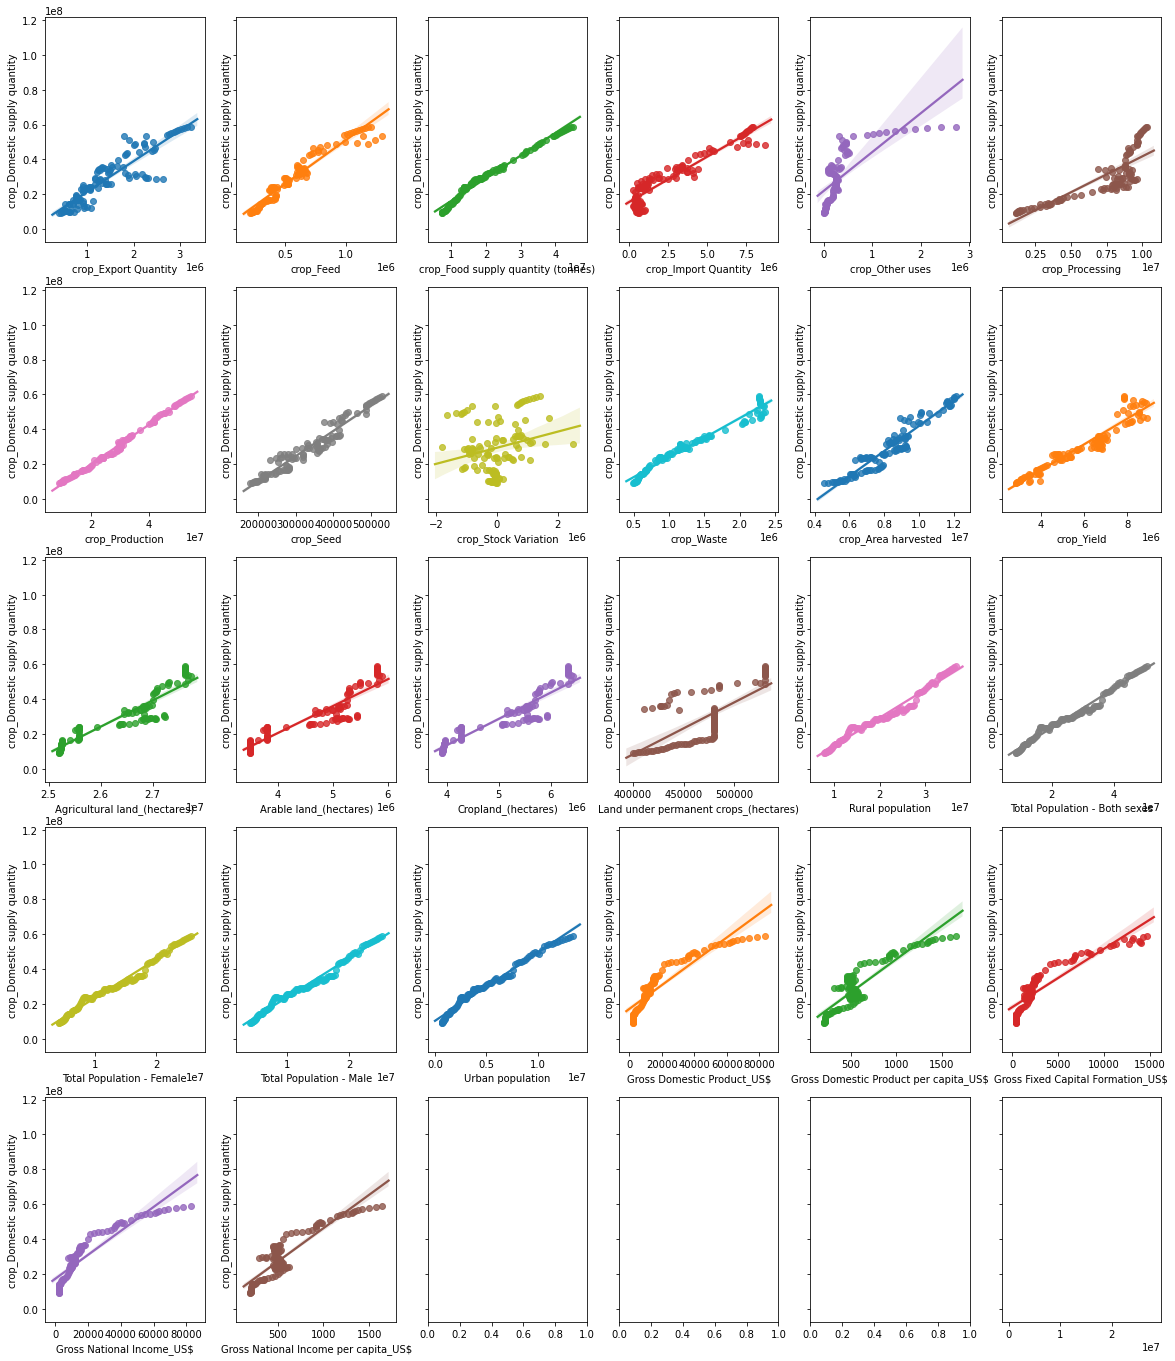

In [47]:
regression_plots(crop_full_df,"crop_Domestic supply quantity",6)

### Train test split

In [48]:
anim_x = animal_full_df[animal_full_df.columns[animal_full_df.columns!="animal_Domestic supply quantity"]]#pick values from those that are correlated
anim_y = animal_full_df["animal_Domestic supply quantity"]
crop_x = crop_full_df[crop_full_df.columns[crop_full_df.columns!="crop_Domestic supply quantity"]]#pick values from those that are correlated 
crop_y = crop_full_df["crop_Domestic supply quantity"]

#using years*2 because i resampled to semi annual 
x_animal_train, x_animal_test = anim_x.iloc[:len(anim_x)-number_of_years_to_predict*2,:] , anim_x.iloc[-number_of_years_to_predict*2:,:]
y_animal_train, y_animal_test = anim_y[:len(anim_x)-number_of_years_to_predict*2] , anim_y[-number_of_years_to_predict*2:]

x_crop_train, x_crop_test = crop_x.iloc[:len(crop_x)-number_of_years_to_predict*2,:] , crop_x.iloc[-number_of_years_to_predict*2:,:]
y_crop_train, y_crop_test = crop_y[:len(crop_x)-number_of_years_to_predict*2],crop_y[-number_of_years_to_predict*2:]

# VAR MODEL

In [49]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests #test for causality between the variables

#### Check the causality of one factor to another

In [50]:
test = "ssr_chi2test"
def granger_causality_matrix(dataframe,variables,test ,max_lag,verbose=False):
    df = pd.DataFrame(np.zeros((len(variables),len(variables))), columns = variables, index=variables)
    
    for k in df.columns:
        for l in df.index:
            try:
                test_result = grangercausalitytests(dataframe[[l,k]],maxlag=max_lag,verbose=False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(max_lag)]
                if verbose : print(f"Y = {l},X={k}, P Values = {p_values}")
                min_p_value=np.min(p_values)
                df.loc[l,k]=min_p_value
            except:
                df.loc[l,k] = "Didn't work"
    df.columns = [var for var in variables]
    df.index = [var for var in variables]
    
    
    return df    

In [51]:
gg_matrix = granger_causality_matrix(x_crop_train ,x_crop_train.columns,"ssr_chi2test",5)
gg_matrix

,crop_Export Quantity,crop_Feed,crop_Food supply quantity (tonnes),crop_Import Quantity,crop_Other uses,crop_Processing,crop_Production,crop_Seed,crop_Stock Variation,crop_Waste,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
crop_Export Quantity,1.0000,0.0140,0.0039,0.0393,0.0008,0.0382,0.0004,0.0037,0.0190,0.0020,...,0.0010,0.0008,0.0008,0.0009,0.0048,0.0409,0.1358,0.0754,0.0502,0.1448
crop_Feed,0.0104,1.0000,0.0014,0.0022,0.3067,0.3379,0.0975,0.0212,0.0058,0.0023,...,0.0590,0.0216,0.0239,0.0193,0.0032,0.0000,0.0000,0.0000,0.0000,0.0000
crop_Food supply quantity (tonnes),0.0150,0.2075,1.0000,0.3544,0.0657,0.8483,0.0257,0.0000,0.0268,0.4098,...,0.0204,0.0056,0.0026,0.0091,0.0000,0.1613,0.3163,0.2057,0.1676,0.3185
crop_Import Quantity,0.0045,0.0143,0.0000,1.0000,0.0689,0.1142,0.0045,0.0272,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
crop_Other uses,0.2206,0.0482,0.0053,0.0904,1.0000,0.0119,0.0010,0.0052,0.2928,0.0049,...,0.0006,0.0000,0.0000,0.0000,0.0047,0.0025,0.0004,0.0116,0.0029,0.0004
crop_Processing,0.2534,0.1238,0.0183,0.3206,0.0166,1.0000,0.0001,0.0019,0.0005,0.0086,...,0.0127,0.0002,0.0000,0.0006,0.0609,0.0004,0.0000,0.1274,0.0003,0.0000
crop_Production,0.0460,0.4975,0.0762,0.0038,0.1299,0.1634,1.0000,0.0000,0.0037,0.1469,...,0.0033,0.0000,0.0000,0.0000,0.0195,0.1068,0.0488,0.1075,0.1302,0.0673
crop_Seed,0.0051,0.0000,0.0000,0.0154,0.2445,0.0401,0.0000,1.0000,0.0705,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0045,0.0494,0.0180,0.0051,0.0416
crop_Stock Variation,0.0820,0.3823,0.7221,0.1684,0.4839,0.2404,0.5531,0.0170,1.0000,0.3866,...,0.2495,0.1091,0.1367,0.0882,0.4346,0.0000,0.0000,0.0000,0.0000,0.0000
crop_Waste,0.1995,0.2327,0.0125,0.1923,0.4293,0.3865,0.2596,0.0000,0.0019,1.0000,...,0.0056,0.0009,0.0005,0.0013,0.0000,0.0094,0.0609,0.0832,0.0087,0.0577


In [52]:
ff_matrix = granger_causality_matrix(x_animal_train , x_animal_train.columns,"ssr_chi2test",5)
ff_matrix

,animal_Export Quantity,animal_Feed,animal_Food supply quantity (tonnes),animal_Import Quantity,animal_Other uses,animal_Processing,animal_Production,animal_Seed,animal_Stock Variation,animal_Waste,...,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,Gross Domestic Product_US$,Gross Domestic Product per capita_US$,Gross Fixed Capital Formation_US$,Gross National Income_US$,Gross National Income per capita_US$
animal_Export Quantity,1.0000,0.5702,0.4467,0.2734,0.5164,0.8344,0.4512,0.0541,0.0018,0.3478,...,0.1233,0.2235,0.2344,0.2176,0.5790,0.6302,0.4485,0.9224,0.6453,0.4659
animal_Feed,0.3645,1.0000,0.0008,0.7268,0.0943,0.8225,0.0010,0.8735,0.3006,0.0000,...,0.0072,0.0002,0.0001,0.0003,0.0031,0.0092,0.0869,0.0014,0.0078,0.0670
animal_Food supply quantity (tonnes),0.0228,0.0000,1.0000,0.0369,0.1917,0.0005,0.0146,0.0003,0.4675,0.0065,...,0.0008,0.0004,0.0004,0.0003,0.0002,0.1226,0.3079,0.1845,0.1197,0.2471
animal_Import Quantity,0.5537,0.5686,0.7392,1.0000,0.2899,0.6283,0.7128,0.2873,0.0000,0.6314,...,0.0115,0.2322,0.2684,0.2033,0.0010,0.3205,0.0756,0.2745,0.3220,0.0821
animal_Other uses,0.8240,0.0253,0.1099,0.3065,1.0000,0.0229,0.0855,0.1946,0.2039,0.0731,...,0.0094,0.0048,0.0046,0.0052,0.1340,0.0055,0.0038,0.0082,0.0064,0.0053
animal_Processing,0.5961,0.7605,0.0010,0.4824,0.1209,1.0000,0.0012,0.8353,0.1821,0.0000,...,0.0090,0.0002,0.0001,0.0004,0.0040,0.0119,0.1199,0.0023,0.0101,0.0934
animal_Production,0.0062,0.0001,0.0208,0.0428,0.4747,0.0012,1.0000,0.0000,0.5354,0.0204,...,0.0573,0.0314,0.0308,0.0312,0.0011,0.2534,0.6842,0.4629,0.2211,0.5404
animal_Seed,0.7727,0.1317,0.5057,0.0017,0.5223,0.2001,0.2379,1.0000,0.0703,0.1197,...,0.2750,0.0177,0.0258,0.0120,0.5000,0.3552,0.2746,0.2801,0.3350,0.2468
animal_Stock Variation,0.6794,0.0144,0.3228,0.2894,0.2692,0.0186,0.2438,0.4384,1.0000,0.2150,...,0.1851,0.2164,0.1587,0.2701,0.1826,0.0348,0.0466,0.0474,0.0348,0.0421
animal_Waste,0.2233,0.0003,0.0002,0.1936,0.0858,0.0003,0.0021,0.0001,0.2166,1.0000,...,0.0930,0.0145,0.0187,0.0119,0.0089,0.0386,0.5231,0.1065,0.0203,0.4394


#### Combine those with a causal effect on each other. Select those whose causality is 90% , i.e <0.1 , just to have a wider sample.
#### Those not able to fit into any combination are assigned a seperate list

In [53]:
def granger_column_combinations(df,list_n,dataframe_columns): 
    global global_list_n
    global non_compatible
    global_list_n = list_n.copy()
    non_compatible = [i for i in dataframe_columns]
    
    
    if any(len(b)==1 for b in list_n):
        for i in list_n:
            if len(i)==1:
                dict_for_j = dict()
                list_of_not_i = [x for x in list_n if x!=i]
                for k,j in enumerate(list_of_not_i):
                    direction_one = df.loc[i,j].values # i causing j
                    direction_two = df.loc[j,i].values # j causing i
                    #print(len(direction_one),direction_one)
                    flat_list = [item for sublist in direction_one for item in sublist]
                    flat_list2 = [item2 for sublist2 in direction_two for item2 in sublist2]

                    if all(x < 0.1 for x in flat_list) and all(y < 0.1 for y in flat_list2): #0.051 to cater for 0.05
                        # *100 because the values it gave were too small
                        pair_the_flat_lists = [d for d in zip((np.array(flat_list))*100,(np.array(flat_list2))*100 )]

                        mean_of_std = np.mean([np.std(b) for b in pair_the_flat_lists]) #get mean of std for it causing and being caused for that combination

                        dict_for_j[k]=mean_of_std#pick the combination with least standard deviation      

                if bool(dict_for_j):#if it found combinations
                    min_val_in_dict = min(dict_for_j,key=dict_for_j.get)                  
                    list_of_not_i[min_val_in_dict].append(i[0])
                    for column_name in list_of_not_i[min_val_in_dict]:#remove all columns that match to remain with those that don't
                        if column_name in non_compatible:
                            non_compatible.remove(column_name)
        
                    list_n=list_of_not_i.copy()
               
        granger_column_combinations(df,list_of_not_i,non_compatible) 
    
    return global_list_n,non_compatible  
                

In [54]:
crop_col_list = [[i] for i in gg_matrix.columns]
crop_combinations, crop_incompatible = granger_column_combinations(gg_matrix, crop_col_list , gg_matrix.columns)

In [55]:
animal_col_list =  [[i] for i in ff_matrix.columns]
animal_combinations, animal_incompatible = granger_column_combinations(ff_matrix, animal_col_list , ff_matrix.columns)

In [56]:
#animal_incompatible

In [57]:
#animal_combinations

### Cointegration

### Coint johansen only works for 12 columns

In [58]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [59]:
def cointegration_test(dataframe,list_of_combinations,alpha=0.05):
    for i in list_of_combinations:
        out = coint_johansen(dataframe[i],-1,1)
        d = {"0.90":0,"0.95":1,"0.99":2}
        traces=out.lr1
        cvts = out.cvt[:,d[str(1-alpha)]]
        
        for col,trace,cvt in zip(dataframe.columns,traces,cvts):
            if trace<alpha and cvt<alpha:
                print("Null hypothesis True for ",i)#print if any implies that there is no cointegration i.e null hypothesis is true
           

In [60]:
cointegration_test(x_animal_train,animal_combinations)

In [61]:
cointegration_test(x_crop_train,crop_combinations)


## Function to use VAR on combined columns and LSTM on the non-compatible ones on  

In [62]:
#Check for stationarity and Make the series stationary 
#Check for variance in residuals

In [63]:
from statsmodels.tsa.stattools import adfuller
#Durbin_watson statistic to check for residuals
from statsmodels.stats.stattools import durbin_watson

In [64]:
#Test for stationarity
def adfuller_test(series , name='', signif = 0.05, verbose =False):
    adf_result = adfuller(series,autolag ='AIC')
    output = {'test statistic ': round(adf_result[0],4),'pvalue' :round(adf_result[1],4),'n_lags ':round(adf_result[2],4),'n_observations ':adf_result[3]}
    p_value=output['pvalue']
    
    if p_value<=signif:
        return True

In [65]:
#flatten the list of combinations
crop_series_columns = [j for i in crop_combinations for j in i]
animal_series_columns = [j for i in animal_combinations for j in i]

In [66]:
#make the df stationary #difference all columns same no. of times 
def differencing_for_stationarity(dataframe,series_columns,count=0,diff_count_ = 0 ):
    #series columns = columns from the selected list of combinations
    global dataframe_diff
    global  no_of_times_diff
    for i in series_columns:
        if adfuller_test(dataframe[i],i):
            count=count+1
       
    if count!=len(series_columns):#difference if the number of stationary columns != total no. of columns i.e all columns must be stationary
        dataframe_diff= dataframe.diff().dropna().copy()
        no_of_times_diff = diff_count_+1
        differencing_for_stationarity(dataframe_diff,dataframe_diff.columns,diff_count_ =no_of_times_diff )
        
    
    dataframe_diff =dataframe_diff
    
    return dataframe_diff,no_of_times_diff
    

In [67]:
#Getting the optimal Lag
def optimal_lag_and_residual_variance_check(df):
    model = VAR(df)
    
    if 'minimum_AIC' in locals():#remove the minimum AIC from any previous operations
        del minimum_AIC

    for i in range(1,12):
        result=model.fit(i)
        

        if 'minimum_AIC' not in locals():
            minimum_AIC = result.aic #creating the minimum aic
            optimal_lag_order = i

        if result.aic <= minimum_AIC:
            optimal_lag_order = i
            minimum_AIC = result.aic
            try: #cater for excess index
                result=model.fit(i+1)
                if result.aic > minimum_AIC:#stop when the AIC rises at any point after the first selection and pick the lag order before the rise
                    break;
                    
            except:
                pass


    model_fitted = model.fit(optimal_lag_order)

    #Durbin Watson Statistic ::: Check for serial correlation , Ensure the model almost fully explains the variance
    out = durbin_watson(model_fitted.resid)
    for col,val  in zip(df.columns,out):
        if val>2+0.5 or val<2-0.5:  #the closer the value is to 2.0 the better 
            print(f"Durbin Watson (Residual) Error in {col} = {val}")
            
            
    return model_fitted

In [68]:
from datetime import timedelta #to use when adding to date time index

### predicting with VAR

In [69]:
def var_prediction(the_fitted_model,differenced_df,number_of_years_to_predict):
    #get_lag_order
    lag_order=the_fitted_model.k_ar
    forecast_input = differenced_df[-lag_order:]
    forecast_input
    
    fc = the_fitted_model.forecast(y=forecast_input.values,steps=2*number_of_years_to_predict)
    
    df_forecast = pd.DataFrame(fc , index = pd.date_range( start = differenced_df.index[-1]+timedelta(weeks=24) ,periods = 2*number_of_years_to_predict,freq='2BQ'),                                                     
                                                          columns=differenced_df.columns) #set the resulting dataframe to have proper index
    #timedelta is 24 weeks i.e 6 months 
    #add 6 months to the last index and continue from there
    
    return df_forecast

In [70]:
#Invert the transformation
def inverse_transform(original_df,df_forecast,no_of_times_diff):
    df_fc = df_forecast.copy()
    columns=original_df.columns
    
    for col in columns:
        if no_of_times_diff >1:
            for diff_no in range(no_of_times_diff, 1,-1):
                value_to_add = []
                for i in range(diff_no, 1,-1):#repeat for all diferenced times
                    #inverse for any number of differenced times greater than 1  
                    value_for_subtraction = original_df[col].iloc[-(i-1)] - original_df[col].iloc[-i]
                    value_to_add.append(value_for_subtraction)
                    
                for k in range(diff_no, 1,-1):#repeat for all diferenced times at this stage
                    for j in range(len(value_to_add)):
                        try:
                            value_to_add[j] = value_to_add[j+1]-value_to_add[j]
                        except:
                            pass 
                    if len(value_to_add)>1:
                        value_to_add = value_to_add[:-1].copy()#select only values up to but not including the last one // each diff reduces length by 1

             
                df_fc[col] = value_to_add[0]+df_fc[col].cumsum()
                
                            
        #roll_back last diff
        df_fc[col]=original_df[col].iloc[-1] + df_fc[col].cumsum()
    return df_fc

In [71]:
def all_from_start_to_pred(dataframe, list_of_combinations):
    full_pred_df = pd.DataFrame()
    for i in list_of_combinations:#loop through all combinations of columns generated 
        differenced_dataframe , no_of_times_diff = differencing_for_stationarity(dataframe[i],i,count=0 )
        model_fitted = optimal_lag_and_residual_variance_check(differenced_dataframe)
        df_forecast = var_prediction(model_fitted,differenced_dataframe,number_of_years_to_predict)
        pred_df = inverse_transform(dataframe[i],df_forecast,no_of_times_diff)
        full_pred_df = pd.concat([full_pred_df,pred_df],axis=1)#combine all predictions
        #print(i)
        
    return full_pred_df

In [72]:
crop_prediction  = all_from_start_to_pred( x_crop_train, crop_combinations )

In [73]:
#crop_prediction

In [74]:
animal_prediction = all_from_start_to_pred( x_animal_train, animal_combinations )

In [75]:
#For the columns that did not fit any combination we do LSTM
def lstm_for_incompatible(dataframe, list_of_incompatible_columns, number_of_years_to_predict):
    
    df_of_results = pd.DataFrame(columns = list_of_incompatible_columns, 
                                 index = pd.date_range( start = dataframe.index[-1]+timedelta(weeks=24) ,periods = 2*number_of_years_to_predict,freq='2BQ'))
    
    for i in list_of_incompatible_columns:
        data_series = dataframe[i]
        
        #make the series stationary
        if all( h>0 for h in  data_series):
            training_data_scaled_log2 = np.log2(data_series)            
            data_series_scaled  = training_data_scaled_log2.diff().dropna()

        else:
            for index_of_zero_val,g in enumerate(data_series):
                if g == 0.0:
                    training_data[index_of_zero_val] = 1

            negative_vals_indices  = data_series.index[data_series<0]
            training_data = abs(data_series) #cater for negative values
            training_data_scaled_log2 = np.log2(training_data)
            training_data_scaled_log2[negative_vals_indices] = training_data_scaled_log2[negative_vals_indices ]*-1          
            data_series_scaled  = training_data_scaled_log2.diff().dropna()
        
        
        x=[]
        y=[]
        
        len_series=len(data_series_scaled)-2*number_of_years_to_predict
            
        for j in range(len_series,len(data_series_scaled)):
            x.append(data_series_scaled[j-len_series:j])
            y.append(data_series_scaled[j])
        
        x_train,y_train=np.array(x),np.array(y)
        x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
        
        
        model= model_for_lstm_filling(x_train ,y_train,lstm_units=30)
        
        
        initial_prediction = model.predict(x_train)
    
        #inverse transform the prediction
        inverse_diff_pred = training_data_scaled_log2[-1]+initial_prediction.cumsum()
        if all(h for h in inverse_diff_pred>0):
            prediction = 2**inverse_diff_pred
        else:
            prediction = 2**abs(inverse_diff_pred)
            for ind, item in enumerate(initial_prediction):
                if item<0:
                    prediction[ind]= prediction[ind]*-1#cater for negative predictions
                    
        
        df_of_results[i] = prediction        
   
    
    return df_of_results
    

In [76]:
animal_prediction_for_incompatible_cols = lstm_for_incompatible(x_animal_train, animal_incompatible, number_of_years_to_predict )
animal_prediction = pd.concat([animal_prediction,animal_prediction_for_incompatible_cols],axis=1)

In [77]:
crop_prediction_for_incompatible_cols = lstm_for_incompatible(x_crop_train, crop_incompatible, number_of_years_to_predict )
crop_prediction= pd.concat([crop_prediction,crop_prediction_for_incompatible_cols],axis=1)

In [78]:
#animal_prediction

In [79]:
#animal_prediction.loc["2024-12-31",:]

#### Convert the semi-annual predictions back to yearly basis

In [80]:
def semi_annual_pred_to_yearly(prediction_dataframe, number_of_years_to_predict):
    dataframe = prediction_dataframe.rolling(window = number_of_years_to_predict+1).mean().dropna()
    dataframe.index = prediction_dataframe.index.year.unique()
    
    return dataframe

In [81]:
animal_prediction = semi_annual_pred_to_yearly(animal_prediction,number_of_years_to_predict )
crop_prediction = semi_annual_pred_to_yearly(crop_prediction,number_of_years_to_predict )

In [82]:
animal_prediction

,animal_Production,animal_Processing,animal_Production [tonnes],animal_Prod Popultn [No],animal_Waste,animal_Production [Head],animal_Production [1000 No],animal_Yield [100mg/An],animal_Laying [1000 Head],animal_Yield [hg],...,Total Population - Male,animal_Seed,animal_Production [1000 Head],Urban population,animal_Import Quantity,Gross Domestic Product per capita_US$,animal_Other uses,Gross National Income per capita_US$,animal_Export Quantity,animal_Yield/Carcass Weight [0.1g/An]
2012,1.833094e+07,665210.367743,1.375295e+07,1.848811e+06,1.079401e+06,9.470765e+06,1.774008e+06,96450.073973,37454.395297,124.423987,...,2.246827e+07,-21682.999285,-2.455567e+05,1.098102e+07,366639.861859,991.426195,77941.465217,991.706438,190234.339844,57789.063477
2013,1.852958e+07,672415.113012,1.380882e+07,1.616968e+06,1.089519e+06,9.527464e+06,1.793173e+06,96692.797560,38114.520376,133.833709,...,2.276446e+07,-32870.069944,-3.745798e+05,1.121194e+07,408951.942606,995.738572,77991.121284,996.106046,193228.144531,57722.742676
2014,1.873146e+07,679713.120857,1.386545e+07,1.385608e+06,1.099938e+06,9.589515e+06,1.813086e+06,97349.920012,38440.050141,143.295189,...,2.306249e+07,-47101.129300,-5.381999e+05,1.144496e+07,451996.657373,1001.721489,78238.924797,1002.189435,195850.779297,57656.867676
2015,1.893669e+07,687106.855706,1.392289e+07,1.154555e+06,1.110655e+06,9.656888e+06,1.832939e+06,98024.202888,38483.409624,152.806406,...,2.336237e+07,-64768.613913,-7.409895e+05,1.168019e+07,496093.632509,1009.296206,78696.744775,1009.933511,198166.833984,57589.739746
2016,1.914311e+07,694553.008396,1.398087e+07,9.230846e+05,1.121381e+06,9.724103e+06,1.850417e+06,98369.776362,38714.898928,162.313951,...,2.366397e+07,-86295.664544,-9.879480e+05,1.191747e+07,541000.327912,1016.801394,79161.169142,1017.575643,200273.628906,57520.889160
2017,1.935066e+07,702050.270626,1.403935e+07,6.912370e+05,1.132119e+06,9.791694e+06,1.865468e+06,98485.344414,39214.200010,171.822030,...,2.396731e+07,-112068.934309,-1.283304e+06,1.215687e+07,586908.683002,1023.810787,79559.115104,1024.670906,202276.101562,57449.986816
2018,1.956090e+07,709638.985211,1.409885e+07,4.552590e+05,1.142988e+06,9.860449e+06,1.880704e+06,98855.261734,39624.158004,181.546317,...,2.427225e+07,-142480.080384,-1.631470e+06,1.239833e+07,633423.310448,1031.075014,79952.288600,1032.019755,204270.099609,57376.336914


In [83]:
#animal_full_df.tail()

# Regression to predict Domestic supply

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

### Remove columns with very low correlations

In [85]:
crop_cols_vs_dsq = crop_full_df.columns [crop_full_df.columns!="crop_Domestic supply quantity"]
crop_corr_data = abs(crop_full_df.corr()["crop_Domestic supply quantity"][crop_cols_vs_dsq])
crop_prediction= crop_prediction[crop_corr_data.index[crop_corr_data>0.5]]

In [86]:
model_LR = Lasso()
lasso_grid = {"alpha": np.power(10.0,np.arange(-5,3,1))}

In [87]:
def grid_cross_val(x , y , model , param_grid):
    gridsearch = GridSearchCV(estimator=model , param_grid = param_grid, cv=5,scoring = "neg_mean_absolute_error")
    x_max =x.max()
    x =x/x_max
    y = y/y.max()
    result = gridsearch.fit(x,y)
    
    print(model)
    print("GS_CV : Best params = ",result.best_params_,"\nGS_CV : Best score = ",result.best_score_)
    
    scores = cross_val_score(result,x,y,cv=5,scoring="r2")
    print("Cross Val Scores = ",scores,"\nMean score = ",scores[:-2].mean())
    

In [88]:
#Lasso> Ridge> Elatic Net

In [89]:
mmx = MinMaxScaler()
list_of_xdfs = [x_crop_train[crop_corr_data.index[crop_corr_data>0.5]] ,x_crop_test[crop_corr_data.index[crop_corr_data>0.5]] ,crop_prediction]
_ = [mmx.partial_fit(df) for df in list_of_xdfs]
scaled_x = [mmx.transform(df) for df in list_of_xdfs]

x_crop_train_reg, x_crop_test_reg ,crop_prediction_reg = scaled_x[0],scaled_x[1],scaled_x[2]

In [90]:
grid_cross_val(x_crop_train_reg, y_crop_train/y_crop_train.max(), model_LR, lasso_grid) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
GS_CV : Best params =  {'alpha': 1e-05} 
GS_CV : Best score =  -0.0023580554002449474
Cross Val Scores =  [0.99841828 0.99939499 0.99494433 0.99633442 0.99701817] 
Mean score =  0.9975858688997846


In [91]:
def regression_function (df,target_column,prediction_df,x,y):
    cols_corr_to_target = df.columns [df.columns!=target_column]
    df_corr_data = abs(df.corr()[target_column][cols_corr_to_target])
    prediction_df_to_use= prediction_df[df_corr_data.index[df_corr_data>0.5]]

    mmx = MinMaxScaler()
    list_of_xdfs = [x[df_corr_data.index[df_corr_data>0.5]] ,prediction_df_to_use]
    _ = [mmx.partial_fit(df) for df in list_of_xdfs]
    scaled_x = [mmx.transform(df) for df in list_of_xdfs]

    x_train_reg,prediction_reg = scaled_x[0],scaled_x[1],

    lasso_model = Lasso(alpha = 0.00001)
    lasso_model.fit(x_train_reg , y/y.max())
    domestic_supply_pred= lasso_model.predict(prediction_reg)
    domestic_supply_pred = domestic_supply_pred*y.max()

    return domestic_supply_pred

In [92]:
domestic_supply_pred =  regression_function (crop_full_df,"crop_Domestic supply quantity",crop_prediction,x_crop_train,y_crop_train)

In [93]:
domestic_supply_pred

array([44860121.00570059, 42960624.47726174, 40447998.82872965,
       37256991.20868107, 33381972.14169635, 28732970.63354073,
       23220584.26078839])

### Animal data behaved similar to crop data with Lasso regression

In [94]:
#Check the error(which is large)
from sklearn.metrics import mean_squared_error as mse

In [95]:
vb = pd.read_csv("crop_data.csv",index_col="Unnamed: 0",parse_dates=True)
op = semi_annual_pred_to_yearly(vb.iloc[-number_of_years_to_predict*2:,:],number_of_years_to_predict)

In [96]:
op["crop_Domestic supply quantity"]

2012    5.331886e+07
2013    5.422810e+07
2014    5.494111e+07
2015    5.545727e+07
2016    5.597430e+07
2017    5.649246e+07
2018    5.701120e+07
Name: crop_Domestic supply quantity, dtype: float64

In [97]:
mse(semi_annual_pred_to_yearly(y_crop_test,number_of_years_to_predict) ,domestic_supply_pred)

451802111635482.9

## Now using the "actual" data and forecasting 

In [98]:
crop_data_f = pd.read_csv("crop_data.csv",index_col="Unnamed: 0",parse_dates=True)

In [99]:
def all_combined(df,target_column,number_of_years_to_predict):
    x = df[df.columns[df.columns!=target_column]]
    y = df[target_column]
    granger_df = granger_causality_matrix(x,x.columns,test ,max_lag=5,verbose=False)
    list_n = [[i] for i in granger_df.columns]
    df_col_combinations, df_col_incompatible  = granger_column_combinations(granger_df,list_n, x.columns)
    cointegration_test(x,df_col_combinations,alpha=0.05)
    x_var_prediction  = all_from_start_to_pred( x, df_col_combinations )
    pred_for_incompatible_cols = lstm_for_incompatible(x, df_col_incompatible, number_of_years_to_predict)
    prediction = pd.concat([x_var_prediction,pred_for_incompatible_cols],axis=1)
    prediction_df = semi_annual_pred_to_yearly(prediction,number_of_years_to_predict )
    domestic_supply_pred = regression_function (df,target_column,prediction_df,x,y)
    prediction_df["predicted domestic supply"] = domestic_supply_pred

    return prediction_df

In [100]:
crop_predicted_df = all_combined(crop_data_f,"crop_Domestic supply quantity",7)

In [101]:
crop_predicted_df

,crop_Seed,crop_Food supply quantity (tonnes),crop_Area harvested,crop_Waste,crop_Yield,crop_Stock Variation,Rural population,crop_Import Quantity,Total Population - Both sexes,crop_Export Quantity,...,Gross Fixed Capital Formation_US$,crop_Other uses,Gross National Income_US$,Land under permanent crops_(hectares),Gross Domestic Product_US$,Gross National Income per capita_US$,Gross Domestic Product per capita_US$,Arable land_(hectares),Cropland_(hectares),predicted domestic supply
2019,551844.620317,4.792822e+07,1.243127e+07,2.251745e+06,8.046856e+06,1.375964e+06,3.838266e+07,8.339340e+06,5.344948e+07,3.469383e+06,...,24755.040386,4.376987e+06,104253.617134,525661.046749,105235.101493,1969.798661,1988.747402,5.873682e+06,6.378278e+06,6.177270e+07
2020,556830.253337,4.855107e+07,1.248533e+07,2.246585e+06,8.081873e+06,1.372982e+06,3.872851e+07,8.427753e+06,5.403804e+07,3.512062e+06,...,27715.984022,4.782841e+06,109163.825938,524551.411973,110215.889737,2044.455338,2064.674303,5.889902e+06,6.389021e+06,6.236778e+07
2021,561833.563906,4.917908e+07,1.254253e+07,2.241561e+06,8.117969e+06,1.382974e+06,3.907595e+07,8.517302e+06,5.462722e+07,3.551271e+06,...,30983.092037,5.211082e+06,114105.083043,523521.817710,115226.388881,2119.745906,2141.199863,5.906120e+06,6.399847e+06,6.296428e+07
2022,566847.717016,4.981233e+07,1.260282e+07,2.236667e+06,8.153406e+06,1.392762e+06,3.942503e+07,8.608172e+06,5.521705e+07,3.586520e+06,...,34614.239358,5.660188e+06,119078.081664,522575.316933,120267.274500,2195.684320,2218.338228,5.922395e+06,6.410806e+06,6.356277e+07
2023,571866.087901,5.045085e+07,1.266011e+07,2.231378e+06,8.190388e+06,1.410455e+06,3.977592e+07,8.700517e+06,5.580754e+07,3.617369e+06,...,38627.377394,6.125946e+06,124099.729001,521515.922800,125357.911385,2272.226571,2296.112479,5.938781e+06,6.421939e+06,6.416352e+07
2024,576892.863267,5.109451e+07,1.271439e+07,2.225700e+06,8.234573e+06,1.438253e+06,4.012861e+07,8.794141e+06,5.639872e+07,3.644077e+06,...,42985.208919,6.612125e+06,129169.732324,520340.823712,130498.011399,2349.366824,2374.516708,5.955335e+06,6.433262e+06,6.476529e+07
2025,581932.554651,5.174319e+07,1.276882e+07,2.220129e+06,8.280804e+06,1.455352e+06,4.048321e+07,8.888793e+06,5.699061e+07,3.666876e+06,...,47691.398587,7.120579e+06,134278.638488,519184.221746,135677.605482,2427.170670,2453.583944,5.972098e+06,6.444771e+06,6.536829e+07


In [102]:
animal_data_f = pd.read_csv("animal_data.csv",index_col="Unnamed: 0",parse_dates=True)

In [103]:
animal_predicted_df = all_combined(animal_data_f,"animal_Domestic supply quantity",7)

In [104]:
animal_predicted_df

,animal_Waste,animal_Feed,animal_Prod Popultn [No],animal_Producing Animals/Slaughtered [Head],animal_Producing Animals/Slaughtered [1000 Head],animal_Production [tonnes],animal_Production [Head],animal_Yield [hg/An],animal_Food supply quantity (tonnes),animal_Production,...,Gross Fixed Capital Formation_US$,animal_Production [1000 Head],Gross National Income_US$,animal_Other uses,Gross National Income per capita_US$,animal_Import Quantity,Gross Domestic Product per capita_US$,animal_Export Quantity,animal_Seed,predicted domestic supply
2019,1.149853e+06,1.432540e+06,3.093004e+06,5.535395e+07,64398.780951,1.315209e+07,-434793.974905,11651.925778,1.622846e+07,1.916258e+07,...,17842.338630,-1255.353267,103921.390403,106244.177286,1971.246813,570041.116488,1990.165483,122157.881836,3398.230865,2.120670e+07
2020,1.158335e+06,1.441042e+06,3.097747e+06,5.559447e+07,67158.728261,1.323674e+07,-532734.029389,9807.429622,1.643469e+07,1.935887e+07,...,18576.833572,-1555.401674,108747.954193,107707.629143,2046.067544,602051.952471,2066.254038,120439.183594,3374.275665,2.154936e+07
2021,1.166675e+06,1.448904e+06,3.100793e+06,5.591252e+07,69609.302322,1.333444e+07,-589445.299774,7731.876047,1.665777e+07,1.957045e+07,...,19306.890060,-1832.051505,113613.706840,109204.539330,2121.361343,634059.985704,2142.783327,118811.531250,3352.437317,2.190975e+07
2022,1.174876e+06,1.456172e+06,3.101973e+06,5.630874e+07,71750.872446,1.344913e+07,-554444.359316,5409.433651,1.690106e+07,1.979969e+07,...,20032.755677,-2086.288311,118519.455160,110727.228758,2197.120517,666036.235041,2219.746388,117263.207031,3332.460266,2.229134e+07
2023,1.183270e+06,1.464158e+06,3.100744e+06,5.671639e+07,74162.547028,1.355651e+07,-546081.915029,2832.798262,1.716654e+07,2.004884e+07,...,20770.234861,-2374.283506,123467.562470,112254.827495,2273.570956,698691.643415,2297.430609,115782.490234,3313.956879,2.269717e+07
2024,1.191858e+06,1.472844e+06,3.097216e+06,5.713500e+07,76844.593291,1.365875e+07,-605703.396605,9.766170,1.745188e+07,2.031596e+07,...,21519.186973,-2695.201754,128457.693143,113792.840536,2350.718990,732036.473692,2375.841868,114358.366211,3296.532593,2.312481e+07
2025,1.200492e+06,1.481123e+06,3.096547e+06,5.751227e+07,79398.318192,1.375638e+07,-655976.972948,-3058.638973,1.775725e+07,2.060062e+07,...,22271.586191,-3001.084979,133488.909078,115356.425254,2428.361838,765568.148103,2454.751482,112980.926758,3279.849792,2.357354e+07


In [105]:
#Load the predictions to CSVs
crop_predicted_df.to_csv("crop supply fin.csv")
animal_predicted_df.to_csv("animal supply fin.csv")

### Plot the Final Prediction to see the trend

In [106]:
crop_init = crop_data_f["crop_Domestic supply quantity"].resample('12M',convention="start",closed="left").asfreq()
animal_init = animal_data_f["animal_Domestic supply quantity"].resample('12M',convention="start",closed="left").asfreq()

animal_init.index=animal_init.index.year
crop_init.index = crop_init.index.year

animal_supply = pd.concat([animal_init,animal_predicted_df["predicted domestic supply"]])
crop_supply = pd.concat([crop_init,crop_predicted_df["predicted domestic supply"]])

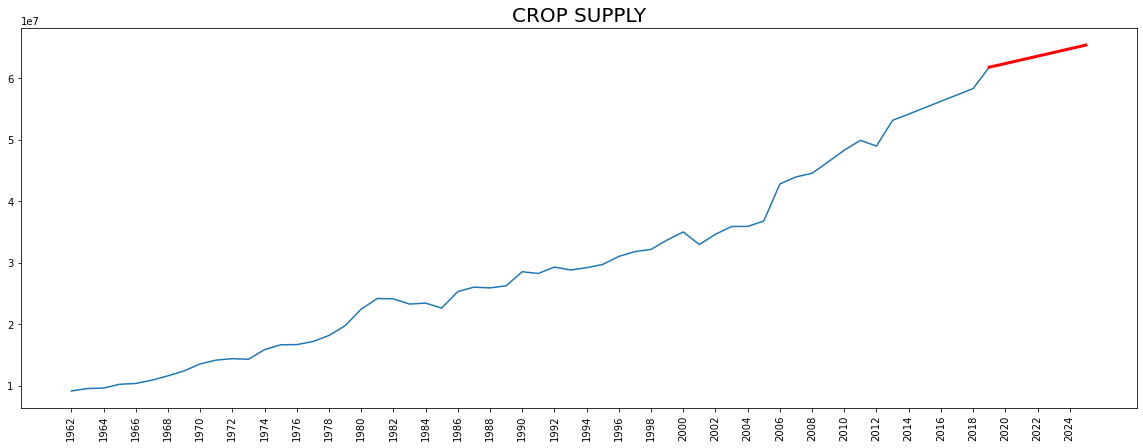

In [107]:
plt.figure(figsize = (20,7))
plt.title("CROP SUPPLY", fontsize=20)
plt.plot(crop_supply,)
plt.plot(crop_predicted_df["predicted domestic supply"],color="red",linewidth=3)
plt.xticks(np.arange(crop_supply.index[0],crop_supply.index[-1],2),rotation=90)
plt.show()

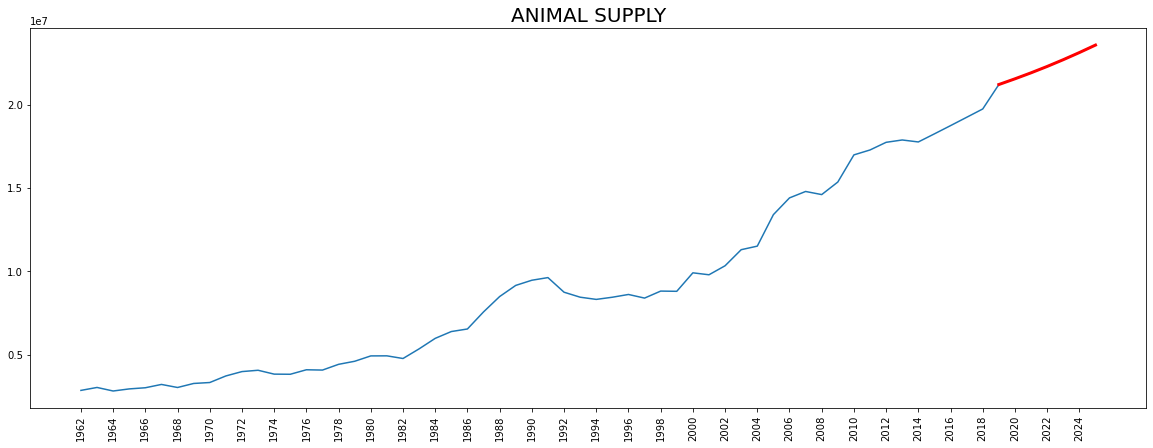

In [108]:
plt.figure(figsize = (20,7))
plt.title("ANIMAL SUPPLY",fontsize=20)
plt.plot(animal_supply)
plt.plot(animal_predicted_df["predicted domestic supply"],color="red",linewidth=3)
plt.xticks(np.arange(animal_supply.index[0],animal_supply.index[-1],2),rotation=90)
plt.show()